In [1]:
import os
import sys

# Sätt base_dir (projektets rotkatalog)
base_dir = os.path.abspath("..")  # En nivå upp från notebooks/
sys.path.append(base_dir)  # Lägg till base_dir i sys.path

# Nu fungerar importerna
from src.objects.optimizer import Optimizer
from src.objects.package import Package
from src.data_processing import load_data
from src.visualization import visualize_fitness, visualize_histogram

import pandas as pd

lagerstatus1 = os.path.join(base_dir, "data", "lagerstatus1.csv")
lagerstatus2 = os.path.join(base_dir, "data", "lagerstatus2.csv")
lagerstatus3 = os.path.join(base_dir, "data", "lagerstatus3.csv")
lagerstatus4 = os.path.join(base_dir, "data", "lagerstatus4.csv")

# Kontrollera att imports fungerar
print("Imports lyckades!")

log_file = os.path.join(base_dir, "logs", "in_use.log")

# Rensa tidigare loggar
if os.path.exists(log_file):
    os.remove(log_file)

# Skapa en ny loggfil
with open(log_file, 'w') as f:
    f.write("New log file\n")


# Skapa testdataset
packages1 = load_data(lagerstatus1)
packages2 = load_data(lagerstatus2)
packages3 = load_data(lagerstatus3)
packages4 = load_data(lagerstatus4)

print(f"Testdata skapad! Package1: {len(packages1)}, Package2: {len(packages2)}, Package3: {len(packages3)}, Package4: {len(packages4)}")

Imports lyckades!
Testdata skapad! Package1: 10000, Package2: 10000, Package3: 10000, Package4: 10000



--- Resultat för Optimering ---
Truck(Truck_1, Total Weight: 800.00, Packages: 246, Total Profit: 1207.00)
Truck(Truck_2, Total Weight: 799.40, Packages: 252, Total Profit: 1217.00)
Truck(Truck_3, Total Weight: 800.00, Packages: 232, Total Profit: 1082.00)
Truck(Truck_4, Total Weight: 800.00, Packages: 227, Total Profit: 1122.00)
Truck(Truck_5, Total Weight: 799.80, Packages: 227, Total Profit: 1056.00)
Truck(Truck_6, Total Weight: 800.00, Packages: 213, Total Profit: 964.00)
Truck(Truck_7, Total Weight: 799.90, Packages: 204, Total Profit: 949.00)
Truck(Truck_8, Total Weight: 800.00, Packages: 211, Total Profit: 909.00)
Truck(Truck_9, Total Weight: 799.80, Packages: 209, Total Profit: 988.00)
Truck(Truck_10, Total Weight: 800.00, Packages: 214, Total Profit: 919.00)

Totalt antal paket kvar i lager: 7765
Total Förtjänst (levererade paket): 10413.0
Totala Straffavgifter: -725.0
Actual total profit: 9688.0


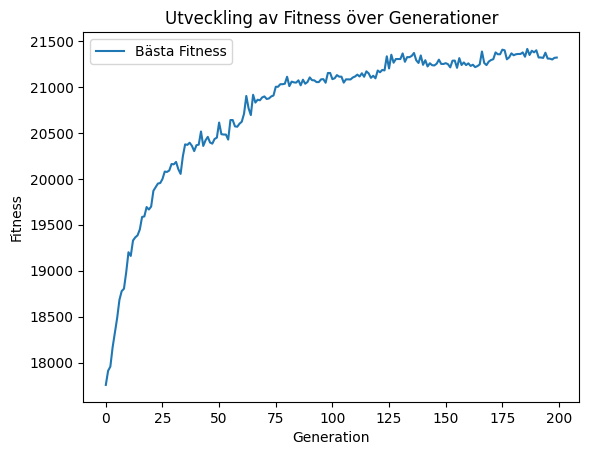

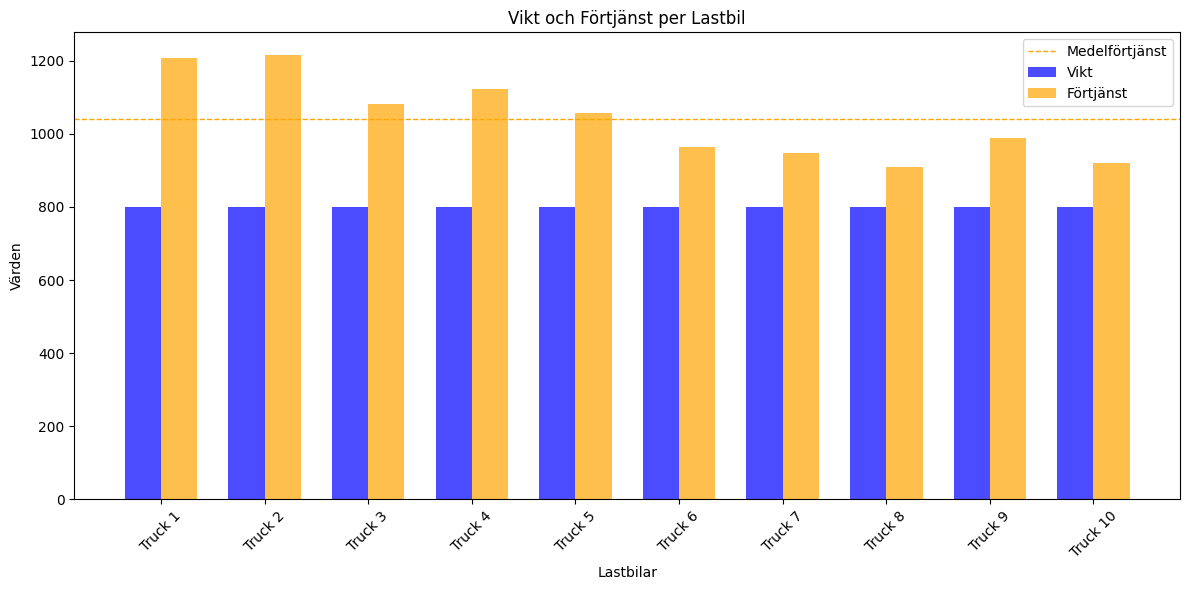

--- Statistik för Lastbilar ---
Medelvikt: 799.89, Varians: 0.03, Std Avvikelse: 0.18
Medelförtjänst: 1041.30, Varians: 11650.81, Std Avvikelse: 107.94


In [2]:
# First file results
optimizer = Optimizer(packages1, max_trucks=10, max_capacity=800, log_file=log_file)

stats, best_solution = optimizer.optimize(population_size=100, generations=200)

optimizer.display_results()

visualize_fitness(stats)

optimizer.analyze_solution()


--- Resultat för Optimering ---
Truck(Truck_1, Total Weight: 799.90, Packages: 297, Total Profit: 1483.00)
Truck(Truck_2, Total Weight: 799.90, Packages: 274, Total Profit: 1327.00)
Truck(Truck_3, Total Weight: 800.00, Packages: 254, Total Profit: 1267.00)
Truck(Truck_4, Total Weight: 799.70, Packages: 254, Total Profit: 1278.00)
Truck(Truck_5, Total Weight: 799.90, Packages: 240, Total Profit: 1117.00)
Truck(Truck_6, Total Weight: 799.90, Packages: 252, Total Profit: 1191.00)
Truck(Truck_7, Total Weight: 799.90, Packages: 235, Total Profit: 1103.00)
Truck(Truck_8, Total Weight: 799.80, Packages: 232, Total Profit: 1096.00)
Truck(Truck_9, Total Weight: 799.90, Packages: 256, Total Profit: 1225.00)
Truck(Truck_10, Total Weight: 799.90, Packages: 230, Total Profit: 1119.00)

Totalt antal paket kvar i lager: 7476
Total Förtjänst (levererade paket): 12206.0
Totala Straffavgifter: -373.0
Actual total profit: 11833.0


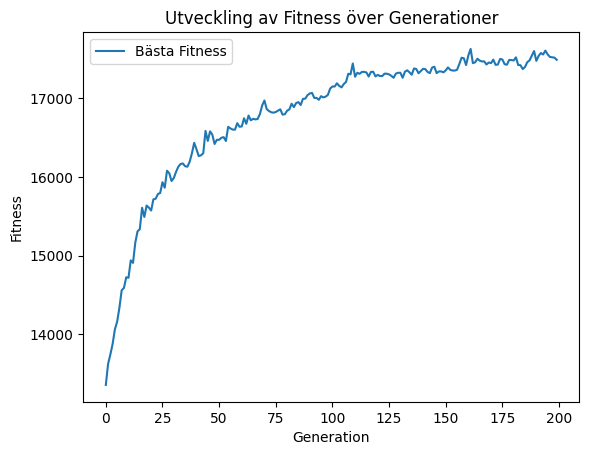

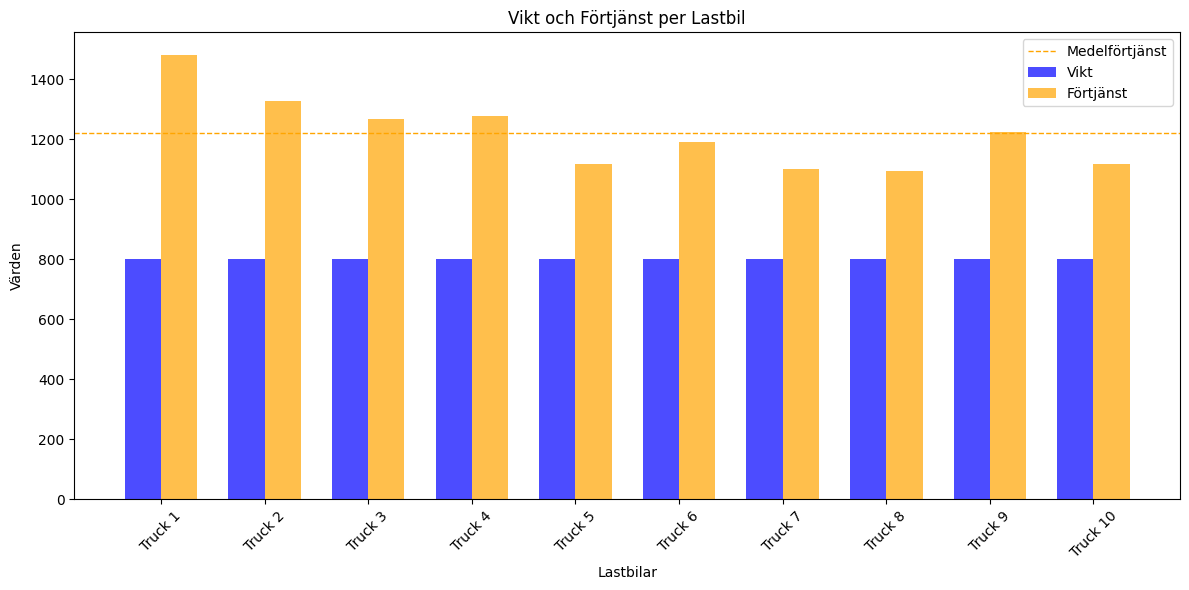

--- Statistik för Lastbilar ---
Medelvikt: 799.88, Varians: 0.01, Std Avvikelse: 0.07
Medelförtjänst: 1220.60, Varians: 13692.84, Std Avvikelse: 117.02


In [3]:
# Second file results
optimizer = Optimizer(packages2, max_trucks=10, max_capacity=800, log_file=log_file)

stats, best_solution = optimizer.optimize(population_size=100, generations=200)

optimizer.display_results()

visualize_fitness(stats)

optimizer.analyze_solution()


--- Resultat för Optimering ---
Truck(Truck_1, Total Weight: 799.90, Packages: 215, Total Profit: 1084.00)
Truck(Truck_2, Total Weight: 799.90, Packages: 247, Total Profit: 1182.00)
Truck(Truck_3, Total Weight: 799.90, Packages: 244, Total Profit: 1145.00)
Truck(Truck_4, Total Weight: 799.90, Packages: 231, Total Profit: 1107.00)
Truck(Truck_5, Total Weight: 799.90, Packages: 231, Total Profit: 1090.00)
Truck(Truck_6, Total Weight: 799.60, Packages: 234, Total Profit: 1109.00)
Truck(Truck_7, Total Weight: 800.00, Packages: 232, Total Profit: 1116.00)
Truck(Truck_8, Total Weight: 799.70, Packages: 222, Total Profit: 1047.00)
Truck(Truck_9, Total Weight: 800.00, Packages: 198, Total Profit: 834.00)
Truck(Truck_10, Total Weight: 799.70, Packages: 194, Total Profit: 872.00)

Totalt antal paket kvar i lager: 7752
Total Förtjänst (levererade paket): 10586.0
Totala Straffavgifter: -830.0
Actual total profit: 9756.0


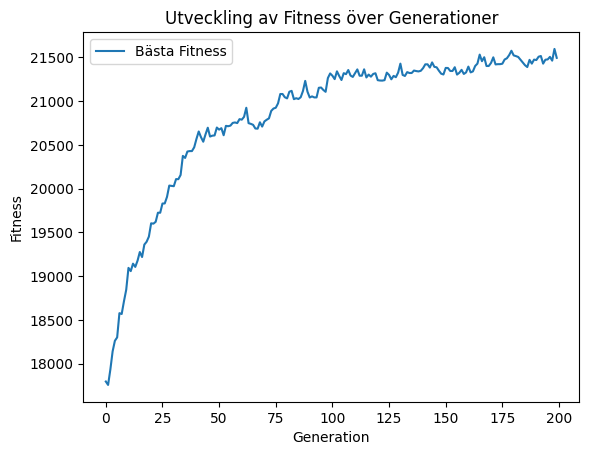

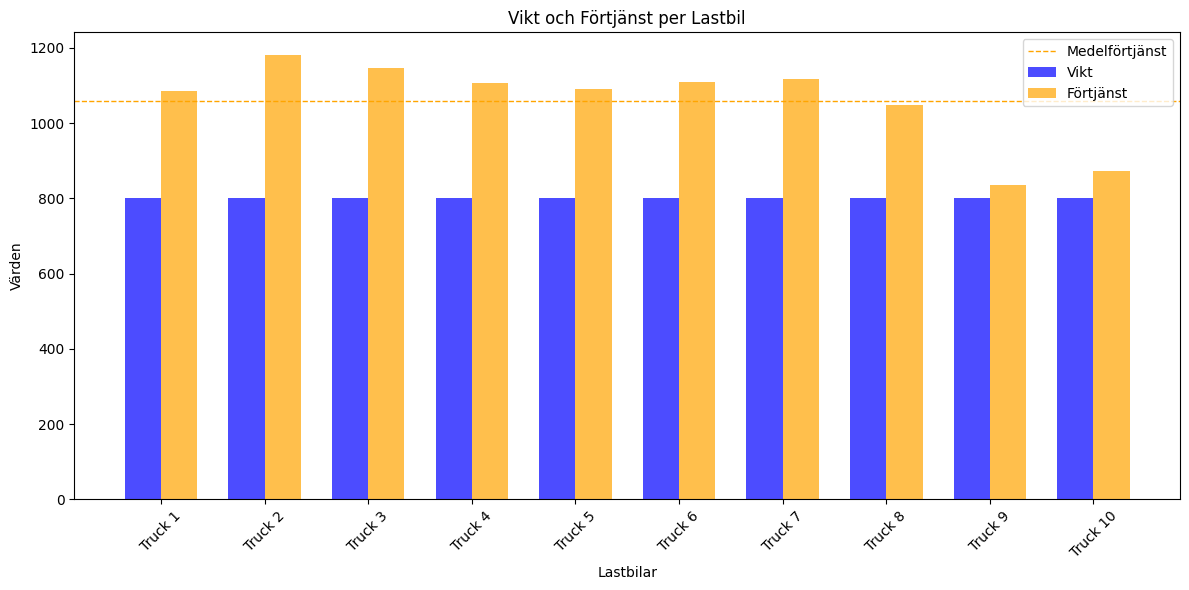

--- Statistik för Lastbilar ---
Medelvikt: 799.85, Varians: 0.02, Std Avvikelse: 0.13
Medelförtjänst: 1058.60, Varians: 11790.04, Std Avvikelse: 108.58


In [4]:
# Third file results
optimizer = Optimizer(packages1, max_trucks=10, max_capacity=800, log_file=log_file)

stats, best_solution = optimizer.optimize(population_size=100, generations=200)

optimizer.display_results()

visualize_fitness(stats)

optimizer.analyze_solution()


--- Resultat för Optimering ---
Truck(Truck_1, Total Weight: 800.00, Packages: 241, Total Profit: 1181.00)
Truck(Truck_2, Total Weight: 799.90, Packages: 261, Total Profit: 1209.00)
Truck(Truck_3, Total Weight: 799.90, Packages: 251, Total Profit: 1170.00)
Truck(Truck_4, Total Weight: 799.90, Packages: 224, Total Profit: 1072.00)
Truck(Truck_5, Total Weight: 800.00, Packages: 223, Total Profit: 1075.00)
Truck(Truck_6, Total Weight: 799.90, Packages: 238, Total Profit: 1203.00)
Truck(Truck_7, Total Weight: 799.90, Packages: 211, Total Profit: 976.00)
Truck(Truck_8, Total Weight: 800.00, Packages: 218, Total Profit: 1049.00)
Truck(Truck_9, Total Weight: 799.60, Packages: 214, Total Profit: 975.00)
Truck(Truck_10, Total Weight: 800.00, Packages: 213, Total Profit: 996.00)

Totalt antal paket kvar i lager: 7706
Total Förtjänst (levererade paket): 10906.0
Totala Straffavgifter: -703.0
Actual total profit: 10203.0


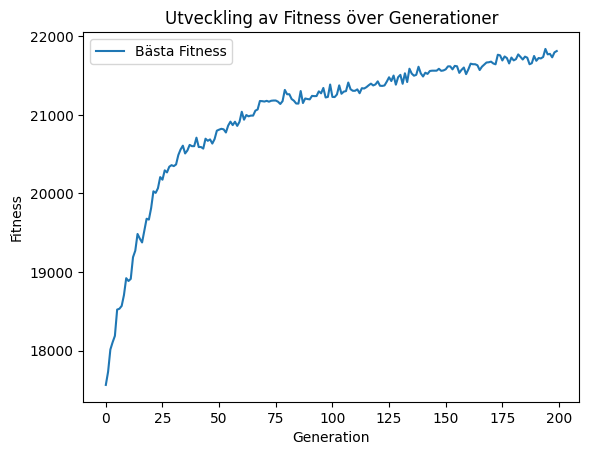

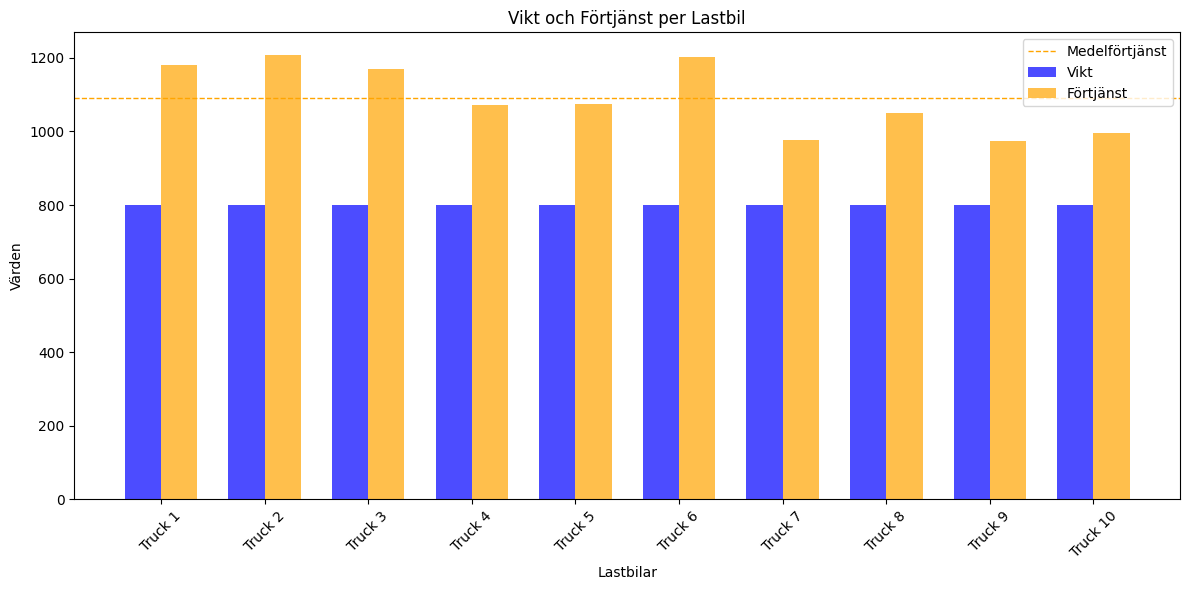

--- Statistik för Lastbilar ---
Medelvikt: 799.91, Varians: 0.01, Std Avvikelse: 0.11
Medelförtjänst: 1090.60, Varians: 7889.44, Std Avvikelse: 88.82


In [5]:
# Fourth file results
optimizer = Optimizer(packages1, max_trucks=10, max_capacity=800, log_file=log_file)

stats, best_solution = optimizer.optimize(population_size=100, generations=200)

optimizer.display_results()

visualize_fitness(stats)

optimizer.analyze_solution()

In [ ]:
# First file results
optimizer = Optimizer(packages1, max_trucks=10, max_capacity=800, log_file=log_file)

stats, best_solution = optimizer.optimize(population_size=100, generations=300)

optimizer.display_results()

visualize_fitness(stats)

optimizer.analyze_solution()